*Carol is the CEO of Multilingo, a language learning platform. She takes digital lectures on the app. 
She wants to integrate a feature on the app in which students can practice translation skills by 
studying 10 translations a day. She has 100 sets of parallel sentences for this task which is scrapped 
from a website.*

# Task 1

Being the data scientist of Multilingo, analyze the scraped dataset using your Python skills. The goal 
is to make the data suitable for reading by the students. Use your imagination to apply different 
processing steps to make the data clean (syntactically and semantically).

## Part-1 Data Loading

`translation.xlsx `have the following fields:


*   English: source in English language
*   German: target in German language




In [1]:
# import necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt 

In [66]:
conda list

# packages in environment at C:\Users\shahmihi\Anaconda3:
Note: you may need to restart the kernel to use updated packages.

#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.11                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.1                    py39_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py39haa95532_2  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2           py39haa95532_0  
argon2-cffi               20.1.0           py39h2bbff1b_1  
arrow                     0.13.1           py39haa95532_0  
asn1crypto                1.4.0                      py_0  
astroid                   2.6.6            py39haa95532_0  
astropy                   

snowballstemmer           2.1.0              pyhd3eb1b0_0  
sortedcollections         2.1.0              pyhd3eb1b0_0  
sortedcontainers          2.4.0              pyhd3eb1b0_0  
soupsieve                 2.2.1              pyhd3eb1b0_0  
spacy                     3.2.4                    pypi_0    pypi
spacy-legacy              3.0.9                    pypi_0    pypi
spacy-loggers             1.0.2                    pypi_0    pypi
sphinx                    4.2.0              pyhd3eb1b0_1  
sphinxcontrib             1.0              py39haa95532_1  
sphinxcontrib-applehelp   1.0.2              pyhd3eb1b0_0  
sphinxcontrib-devhelp     1.0.2              pyhd3eb1b0_0  
sphinxcontrib-htmlhelp    2.0.0              pyhd3eb1b0_0  
sphinxcontrib-jsmath      1.0.1              pyhd3eb1b0_0  
sphinxcontrib-qthelp      1.0.3              pyhd3eb1b0_0  
sphinxcontrib-serializinghtml 1.1.5              pyhd3eb1b0_0  
sphinxcontrib-websupport  1.2.4                      py_0  
spyder            

In [64]:
# read raw data 
sentence_pair_df = pd.read_excel("datascientist-task-data-files/translation-data.xlsx") 

In [23]:
sentence_pair_df.head()

,English,German
0,"""The mask with a grinning man's face appears c...",Die Maske mit grinsendem Männergesicht wirkt d...
1,The WSWS posted this comment on the slanderous...,Die WSWS hatte den folgenden Kommentar zu dies...
2,The Haitian manner of spelling 'vodou' was int...,"""Für diese Ausstellung wurde bewusst die haiti..."
3,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
4,Medially this situation is hushed up with just...,"Medial wird diese Situation, wenige Ausnahmen ..."


# Part-2 Processing data to clean and make suitable for reading by the students.

*  Let us start with checking the shape of each dataframes. This will help us to ensure if the splitting is done correctly or not.

In [24]:
# shape of full dataset 
sentence_pair_df.shape

(100, 2)

In [25]:
# shape of full dataset 
sentence_pair_df.shape

(100, 2)

*   Detecting if the sentence pair in English and German language starting with single or double quotes and ending with single or double quotes.

In [58]:
# check if sentence starts or ends with quotes
quotes_mismatch_index = []
for index, row in sentence_pair_df.iterrows():
    if row['English'].startswith(("'", "\"")) and not row['German'].startswith(("'", "\"")):
        quotes_mismatch_index.append(index)
    elif not row['English'].startswith(("'", "\"")) and row['German'].startswith(("'", "\"")):
        quotes_mismatch_index.append(index)
    elif row['English'].endswith(("'", "\"")) and row['German'].endswith(("'", "\"")):
        quotes_mismatch_index.append(index)
    elif not row['English'].startswith(("'", "\"")) and row['German'].endswith(("'", "\"")):
        quotes_mismatch_index.append(index)
    

In [27]:
# print sentences starting and ending 
# with single or double quotes
sentence_pair_df.iloc[quotes_mismatch_index]

,English,German
0,"""The mask with a grinning man's face appears c...",Die Maske mit grinsendem Männergesicht wirkt d...
2,The Haitian manner of spelling 'vodou' was int...,"""Für diese Ausstellung wurde bewusst die haiti..."
6,Activation mode for events defined in arrEvent...,"""Aktivierungsmodus für Ereignisse, definiert i..."




*   We can observe that in dataset there are sentences starting and ending with single or double quotes. 
*   However, there is inconsistence in when sentences considered as a pair. 
*   E.g., signle or double quotes are present in source sentence but missing in target langauge. 
*   Therefore, it is important to remove single or double quotes in order to eliminate inconsistence of sentences starting and ending with quotes.






In [28]:
# remove quotes from sentences 
for index in quotes_mismatch_index:
    if sentence_pair_df['English'].iloc[index].startswith(("'", "\"")):
        sentence_pair_df['English'].iloc[index] = sentence_pair_df['English'].iloc[index][1:-1]
    elif sentence_pair_df['German'].iloc[index].startswith(("'", "\"")):
        sentence_pair_df['German'].iloc[index] = sentence_pair_df['German'].iloc[index][1:-1]

In [29]:
# print sentences without quotes
sentence_pair_df.iloc[quotes_mismatch_index]

,English,German
0,The mask with a grinning man's face appears ca...,Die Maske mit grinsendem Männergesicht wirkt d...
2,The Haitian manner of spelling 'vodou' was int...,Für diese Ausstellung wurde bewusst die haitia...
6,Activation mode for events defined in arrEvent...,"Aktivierungsmodus für Ereignisse, definiert in..."


*   There are sentences that contain numbers in either source sentence or target sentence.
*    Hence it is important to detect if they are present in both source and target language simultaneously and their isn't any inconsistence similar to `"`. 


In [30]:
# find if integers are present in sentence
def extract_integers(sentence):
    nums = re.findall(r'\d+', sentence)
    return nums

In [31]:
# extract sentences containing integers
numbers_mismatch_index = []
for index, row in sentence_pair_df.iterrows():
    if extract_integers(row['English']) != extract_integers(row['German']):
        numbers_mismatch_index.append(index)

In [38]:
# print sentences containing integers 
sentence_pair_df.iloc[numbers_mismatch_index]

,English,German
1,The WSWS posted this comment on the slanderous...,Die WSWS hatte den folgenden Kommentar zu dies...
16,Leave grass clippings on the lawn.,3. Lassen Sie abgeschnittenes Gras auf dem Ras...
32,Lazio became the predominant province and also...,Das Latium wurde zur Provinz Nummer 1 und umfa...
46,Huflattich 2016. Designed by Anni Freiburgb? r...,Publiziert 3. August 2016 | Von Anni Freiburgb...
51,"A regional ticket allows journeys in Helsinki,...",Zone 2 berechtigt zu grenzüberschreitenden Rei...
61,The Four Suyos must become an organized politi...,Die 4 Suyos muss sich in eine organisierte pol...
70,The text is from Et suk igennem verden går (\\...,Der Text stammt aus Nr. 139 des Dänischen Gesa...
75,if such recognition is manifestly contrary to ...,Die Vorschriften über die Zuständigkeit gehöre...
81,Since 1983 he has trained several generations ...,Seit 1983 hat er mehrere Generationen von Muay...




*   These sentences pair have mismatch in the presence of integer on
the both side i.e. source and target.
*   We can take decision on 
whether to remove these rows or clean them accordingly. We can
use different approach to find out which one to keep and which 
one to delete.

In [39]:
# remove sentences if there is presence of integers 
# in source but not in target and vice a versa 
# and reset index  
sentence_pair_df.drop(index=numbers_mismatch_index, inplace=True)
sentence_pair_df.reset_index(inplace=True, drop=True)

*   It is also important to verify if there are punctuations (for instance `,`,`.`,`?`,`!`,`-`) present in both source and target langauge. 



In [60]:
# detect punctuations present in strings
punctuations = [",", ".", "?", "!", "-"]
punctuation_mismatch_index = []

for index, row in sentence_pair_df.iterrows():
    english_sentence_last_character = row['English'].strip()[-1]
    german_sentence_last_character = row['German'].strip()[-1]
    if (english_sentence_last_character in punctuations) or \
        (german_sentence_last_character in punctuations):
        if english_sentence_last_character != german_sentence_last_character:
            punctuation_mismatch_index.append(index)


In [43]:
# print sentences having punctuations 
sentence_pair_df.iloc[punctuation_mismatch_index]

,English,German
2,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
6,"Mr. Esmond, I resign.","Mr. Esmond, ich trete zurück"
10,"As I have mentioned, SOB offers Greek texts no...",SOB bietet die griechischen Texte nicht nur mi...
33,The flannels are in men's sizes so they are me...,"Die Flanelle sind in Herrengrößen, so sollen s..."
39,14 of 26 Restaurants in Castries 2 reviews,Nr. 14 von 26 Restaurants in Castries 2 Bewert...
49,"This, of course, requires a certain degree of ...",Dies erfordert natürlich eine gewisse Allgemei...
60,"According to previous reports, Commission Vice...",Verschiedenen Berichten zufolge würde der derz...




*   There are several sentences containing punctuation. 
*   However, similar to numbers and `"`, punctuations are also irregular between source and target language. 
*   Therefore, we can remove punctuations from sentences in source and target language.





In [45]:
# remove punctuations from target and source 
for index in punctuation_mismatch_index:
    source_last_character = sentence_pair_df['English'].iloc[index][-1]
    target_last_character = sentence_pair_df['German'].iloc[index][-1]
    if source_last_character in punctuations:
        if target_last_character in punctuations:
            sentence_pair_df['German'].iloc[index] = sentence_pair_df['German'].iloc[index][:-1] + source_last_character
        else:
            sentence_pair_df['German'].iloc[index] = sentence_pair_df['German'].iloc[index] + source_last_character
    else:
        sentence_pair_df['German'].iloc[index] = sentence_pair_df['German'].iloc[index][:-1]

In [46]:
# print sentences without punctuations 
sentence_pair_df.iloc[punctuation_mismatch_index]

,English,German
2,The database also records new manufacturers in...,Die Datenbank nimmt bei jeder neuen Herausgabe...
6,"Mr. Esmond, I resign.","Mr. Esmond, ich trete zurück."
10,"As I have mentioned, SOB offers Greek texts no...",SOB bietet die griechischen Texte nicht nur mi...
33,The flannels are in men's sizes so they are me...,"Die Flanelle sind in Herrengrößen, so sollen s..."
39,14 of 26 Restaurants in Castries 2 reviews,Nr. 14 von 26 Restaurants in Castries 2 Bewert...
49,"This, of course, requires a certain degree of ...",Dies erfordert natürlich eine gewisse Allgemei...
60,"According to previous reports, Commission Vice...",Verschiedenen Berichten zufolge würde der derz...


Outlier in textual length detection and removal

*   Let us now detect, while scrapping multiple sentences are not scrapped in same line either in source or target language. 
*   In oder to do so, let us create a box-plot. 
*   A box-plot is a visualisation tool, that helps to detect outliers present in data. 



In [47]:
# extract sentence having multiple sentences
def token_length(string):
    tokens = string.split(" ")
    return len(tokens)

In [48]:
token_length_difference = sentence_pair_df.apply(lambda row: abs(token_length(row['English'])-
                                       token_length(row['German'])), axis=1)

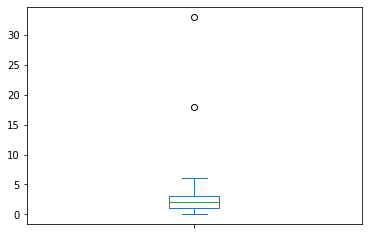

In [49]:
# visualise outliers in textual length
token_length_difference.plot.box()
plt.show()

In [50]:
# print sentence having mismatch in textual lenght
token_length_outlier_index = token_length_difference[token_length_difference > 10].index
sentence_pair_df.iloc[token_length_outlier_index]

,English,German
60,"According to previous reports, Commission Vice...",Verschiedenen Berichten zufolge würde der derz...
90,Device for moulding foamed plastic articles. T...,Vorrichtung zum Giessen von Gegenständen aus g...




*   There is inconsitence in lenght of sentence in target and source langauge. 
*   Hence, it is important to remove additional sentence scrapped. 



In [51]:
# drop data having irregular sentence length 
# reset index
sentence_pair_df.drop(index=token_length_outlier_index, inplace=True)
sentence_pair_df.reset_index(inplace=True, drop=True)

*   Here, let us detect if their is presence inconsistent tags (for instance `<.*?>|>`) in target and source language.



In [52]:
# extract sentences having tags and print them
tags_in_sentence_index = []
for index, row in sentence_pair_df.iterrows():
    source_tags = re.findall(r'<.*?>|>', row['English'])
    target_tags = re.findall(r'<.*?>|>', row['German'])
    if source_tags:
        tags_in_sentence_index.append(index)
        print(index, row['English'])
    if target_tags:
        tags_in_sentence_index.append(index)
        print(index, row['German'])

tags_in_sentence_index = set(tags_in_sentence_index)

79 Prior says the latent potential in Thailand is <B>enormous</B>.
82 Other <i>productions</i> from La Forêt Des Brumes
84 Maximum size of a <tag:value> backup </tag> set for archivelogs
85 Es wird auch einige Zeit zur freien Verfügung stehen, <tag:value> backup </tag> bevor es zurück nach Rennes geht.
88 Their caps are brown <<tag:ends />> and streaked.




*   As we can see, there are is irregularity in tags present in target and source language. 
*   Therefore, it is also important to remove tags from target and source language. 





In [53]:
# remove tags from sentences 
for index in tags_in_sentence_index:
    sentence_pair_df['English'].iloc[index] = re.sub(r'<.*?>|>', "", 
                                                   sentence_pair_df['English'].iloc[index])
    sentence_pair_df['German'].iloc[index] = re.sub(r'<.*?>|>', "", 
                                                   sentence_pair_df['German'].iloc[index])

In [54]:
sentence_pair_df.iloc[list(tags_in_sentence_index)]

,English,German
79,Prior says the latent potential in Thailand is...,"Prior ist dennoch davon überzeugt, dass das vo..."
82,Other productions from La Forêt Des Brumes,Anderen Alben von La Forêt Des Brumes
84,Maximum size of a backup set for archivelogs,Max. Größe einer Sicherungsgruppe für Archivelogs
85,You will then have some free time before the d...,Es wird auch einige Zeit zur freien Verfügung ...
88,Their caps are brown and streaked.,Der Oberkopf ist braun und gestreift.




*   Verfiying, if there is any data loss while pre-processing and cleaning data.


In [55]:
# verfiy data loss while pre-processing
sentence_pair_df.shape

(89, 2)



## Part-3 Store the cleaned. 


*   Cleaned data can be used by students to study translation easily and effectively.  





In [65]:
# store cleaned data
sentence_pair_df.to_excel("datascientist-task-data-files/cleaned-translation-data.xlsx", index=False)